# Adult Census Income Prediction:

## Life cycle of Machine learning Project:

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Conclusions from EDA
6. Data Pre-Processing
7. Model Training
8. Choose best model

### 1. Problem Statement

The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

### 2. Data Collection

Dataset Source- https://www.kaggle.com/datasets/overload10/adult-census-dataset 

#### 2.1 Importing Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv file as a Dataframe

In [9]:
df= pd.read_csv('adult.csv')

Creating a copy of dataframe

In [11]:
a= df.copy()

Display first 5 rows

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Shape of the dataset

In [15]:
df.shape

(32561, 15)

#### 2.2 Dataset Information

a) age: Represents age of the person

b) workclass: Represents the sector in which a person is working

c) education: Represents the level of education acquired by a person

d) marital status: Represents a person's marital status

e) occupation: Represents the occupation a person is working as.

f) relationship: Represents their family relationship.

g) race: represents the race of the person

h) sex: represents the gender of the person.

i) captial gain: represents the capital gains a person is making

j) capital loss: represents the capital loss a person is losing

k) hours per week: represents the amount of hours a person is working

l) country: represents the country in which a person is staying.

m) salary: represents whether the income of the person is above or below 50k 

### 3. Data Checks to perform:

3.1. Check Missing values

3.2. Check Duplicates

3.3. Check data type

3.4. Check the number of unique values of each column

3.5. Check statistics of data set

3.6. Check various categories present in the different categorical column

3.7 Feature Engineering 

#### 3.1 Check missing values

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

There are no missing values in the dataset

#### 3.2 Check Duplicates

In [23]:
df.duplicated().sum() #There are 24 duplicate rows

24

In [24]:
df.drop_duplicates(inplace=True) #Dropping the duplicates

In [25]:
df.duplicated().sum() #Checking the duplicates again

0

#### 3.3 Check datatype

In [32]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

#### 3.4 Check number of unique values of each column

In [39]:
pd.DataFrame({'unique number':df.nunique(),'dtypes':df.dtypes})

,unique number,dtypes
age,73,int64
workclass,9,object
fnlwgt,21648,int64
education,16,object
education-num,16,int64
marital-status,7,object
occupation,15,object
relationship,6,object
race,5,object
sex,2,object


#### 3.5 Creation of lists of numerical and categorical columns

num_cols represent the numerical features and cat_cols represent the categorical features

In [43]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns  # Categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns    # Numerical columns

#### 3.6 Check statistics of dataset

In [46]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Checking distribution of numerical columns

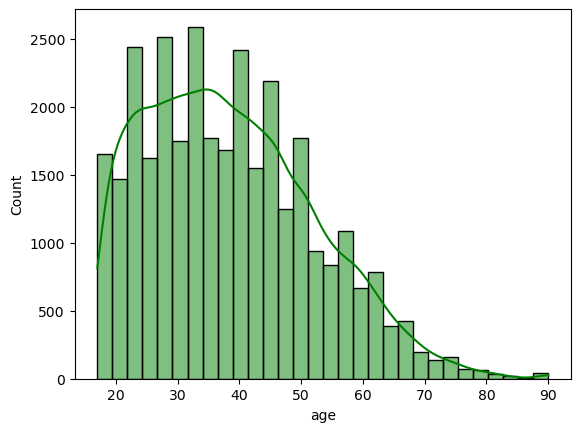

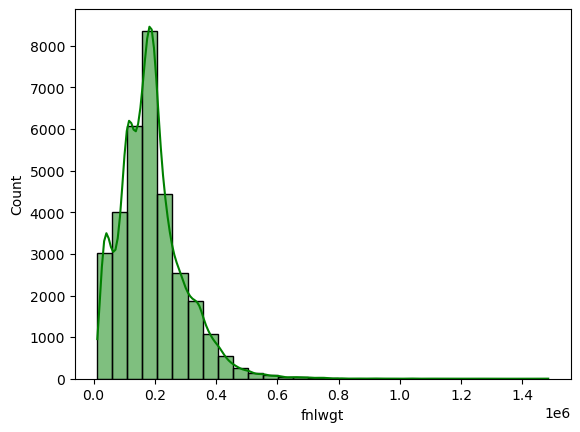

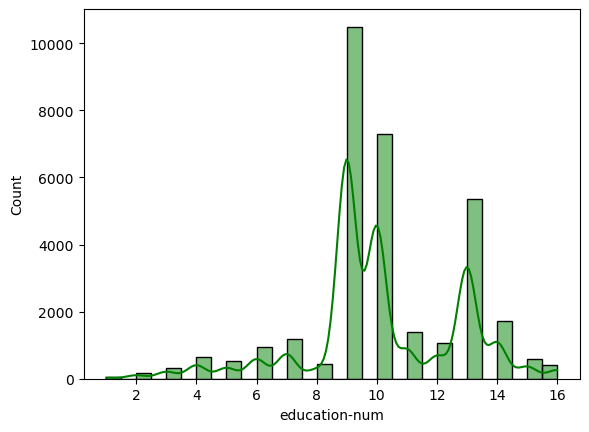

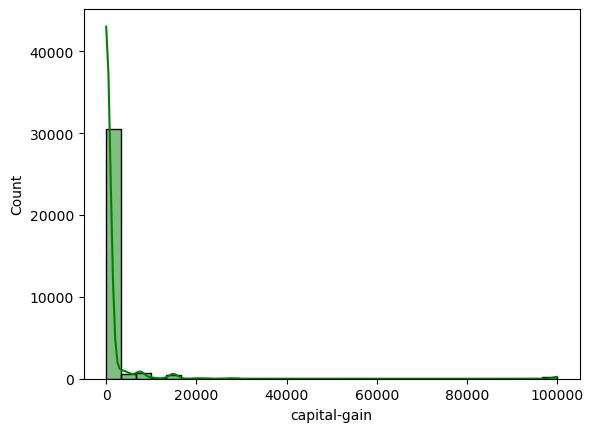

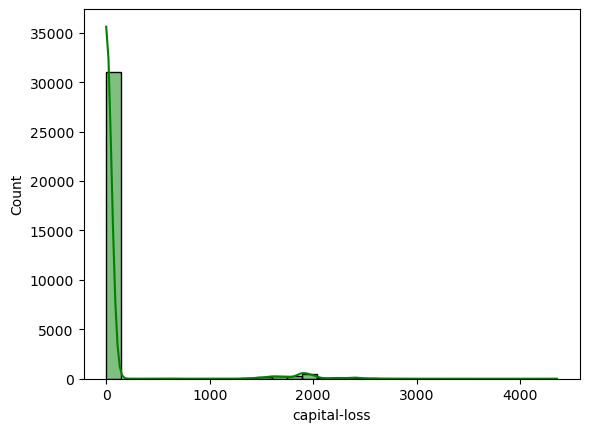

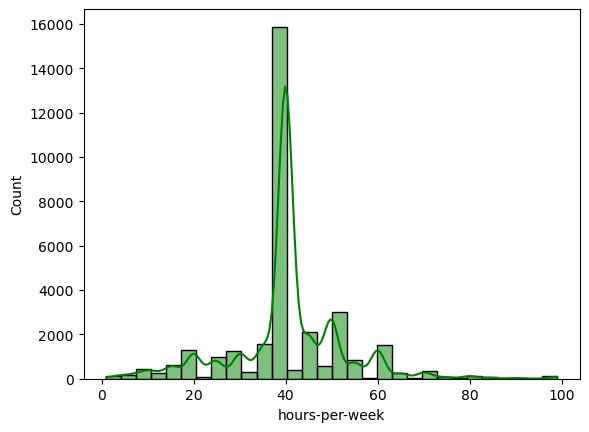

In [49]:
for i in num_cols:
    sns.histplot(data=df,x=i,bins=30,kde=True,color='g')
    plt.show()

#### 3.7 Check various categories present in the different categorical column

In [51]:
df[cat_cols].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [52]:
for col in cat_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in 'marital-status': [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in 'occupation': [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in 'relationship': [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values in 'race': [' White' ' Black' ' Asian-Pac-Islander

#### 3.8 Feature Engineering

Replace ' ?' in all categorical columns with np.nan imputations

In [58]:
for col in cat_cols:
    df[col]=df[col].replace(' ?',np.nan)

Fill all nan values with mode imputations

In [61]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

Converting salary feature into 1 and 0 

In [64]:
df['salary'] = list(map(lambda x:0 if x ==' <=50K' else 1, df['salary']))

Converting cleaned dataframe into csv

In [69]:
df.shape

(32537, 15)

In [71]:
df.to_csv('income.csv',index=False)

Applying particular transformations on columns in numerical columns based on their distributions in section 3.6

In [48]:
# Transformations will be used while doing model training and building but not while EDA

# from scipy.stats import boxcox
# from scipy.stats import skew

# # Function to apply transformations based on skewness
# def transform_skewed_data(df):
#     for col in num_cols:
#         col_skewness = skew(df[col].dropna())
        
#         if col_skewness > 1:  # Right-skewed (Positive skewness)
#             # Apply log transformation, handling any zero or negative values by adding a small constant
#             df[col] = np.log(df[col] + 1e-5)
#             print(f"Applied log transformation to right-skewed column: {col}")
        
#         elif col_skewness < -1:  # Left-skewed (Negative skewness)
#             # Apply reflect and log transformation
#             df[col] = np.log(df[col].max() + 1 - df[col])
#             print(f"Applied reflect and log transformation to left-skewed column: {col}")
        
#         else:  # Both-sided skewed or near-symmetric
#             # Apply Box-Cox transformation, handling negative or zero values by shifting
#             if (df[col] <= 0).any():
#                 df[col] = df[col] - df[col].min() + 1  # Shift values to be positive
#             df[col], _ = boxcox(df[col])
#             print(f"Applied Box-Cox transformation to column with both-sided skew or near-symmetry: {col}")

#     return df

# # Apply transformations
# df = transform_skewed_data(df)

##### Optional Outlier treatment using IQR method

In [50]:
# Function to apply IQR method to detect and cap outliers
# def apply_iqr_outlier_capping(df):
#     for col in num_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Cap outliers
#         df[col] = np.where(df[col] < lower_bound, lower_bound,
#                            np.where(df[col] > upper_bound, upper_bound, df[col]))
#         print(f"Applied IQR outlier capping to column: {col}")

#     return df

# # Apply IQR capping to the transformed data
# df = apply_iqr_outlier_capping(df)

### 4. Exploratory Data Analysis

#### 4.1 education column (univariate and bivariate analysis)

##### Univariate analysis (education column)

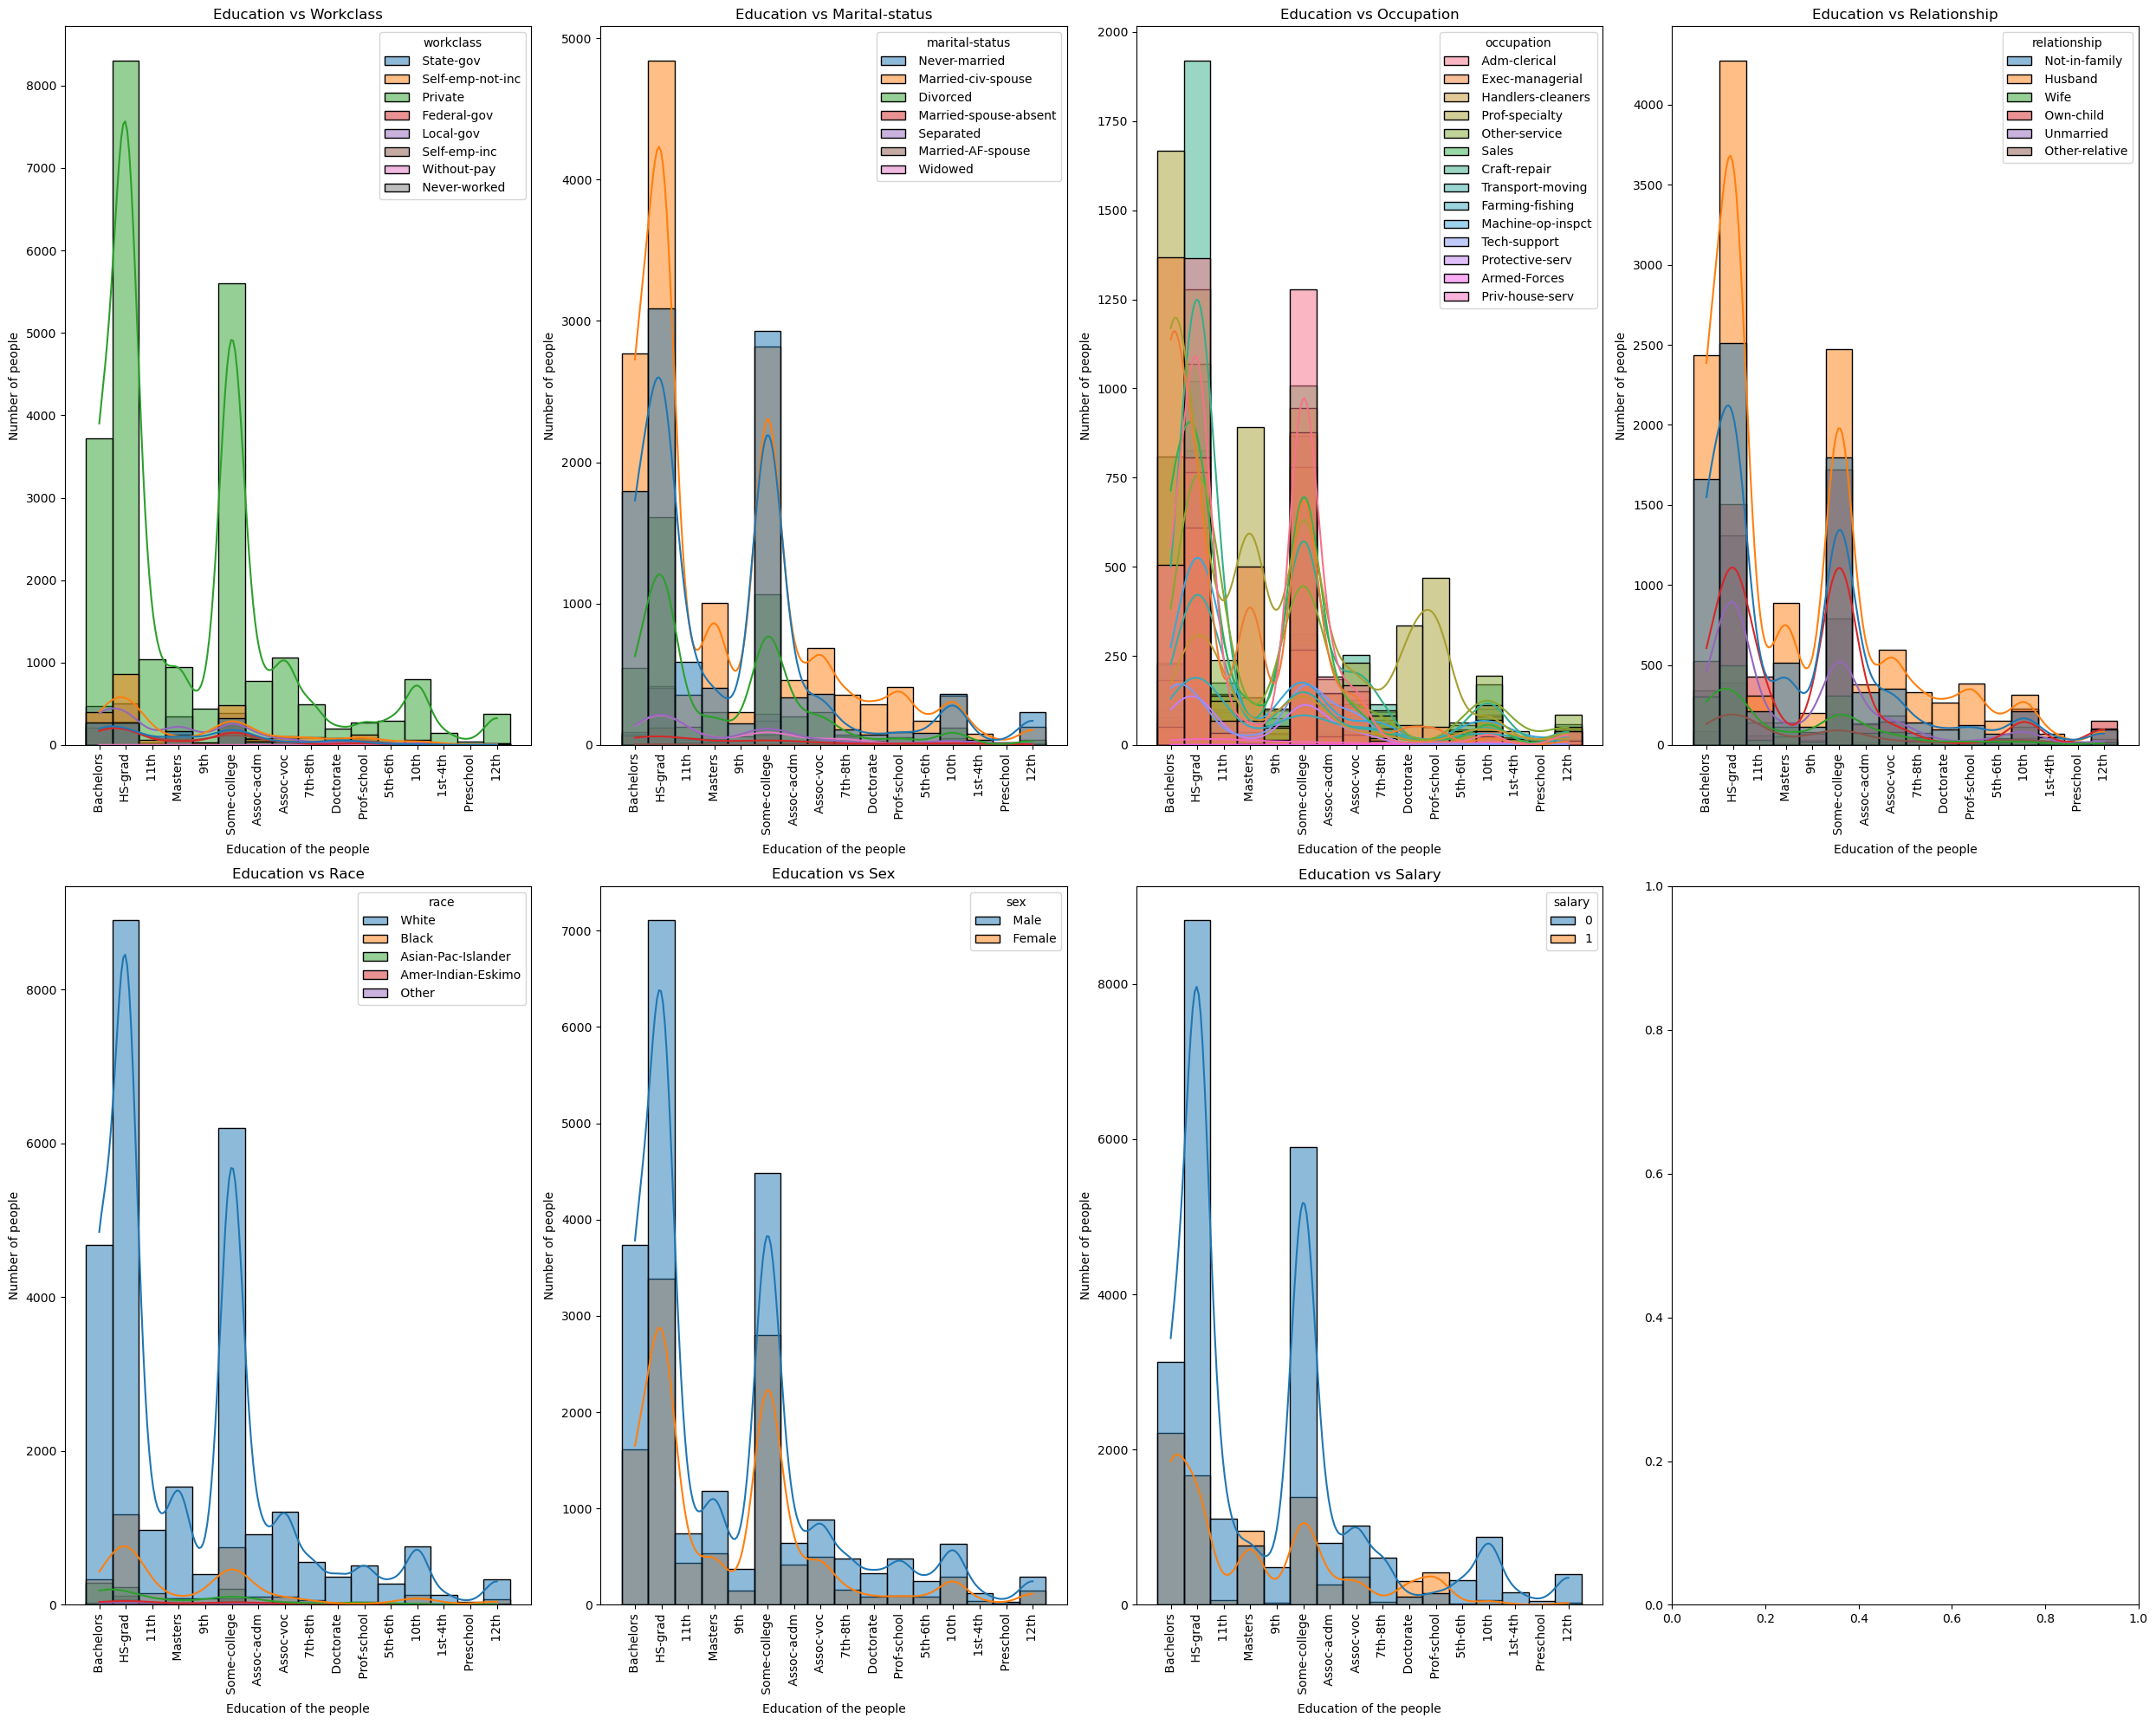

In [92]:
# List of elements to use in hue
hue_elements = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'salary']

# Create subplots (2x4 grid for 8 elements)
fig, axes = plt.subplots(2, 4, figsize=(25, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through hue elements and create a plot for each
for i, hue in enumerate(hue_elements):
    sns.histplot(data=df, x='education', hue=hue, kde=True, ax=axes[i])
    axes[i].set_xlabel('Education of the people')
    axes[i].set_ylabel('Number of people')
    axes[i].set_title(f'Education vs {hue.capitalize()}')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

Most amount of people have done high school or have passed from some college.

People with masters, doctorate or those who have been to a professional school are having salary above 50K

Most of the people are having gender of male in the dataset.

Most of the people are from white race and next most number of people are from black race

There are more number of people who are married-civ-spouse(married plus living with their spouse) and people who have never married.

##### Bivariate analysis (education column)

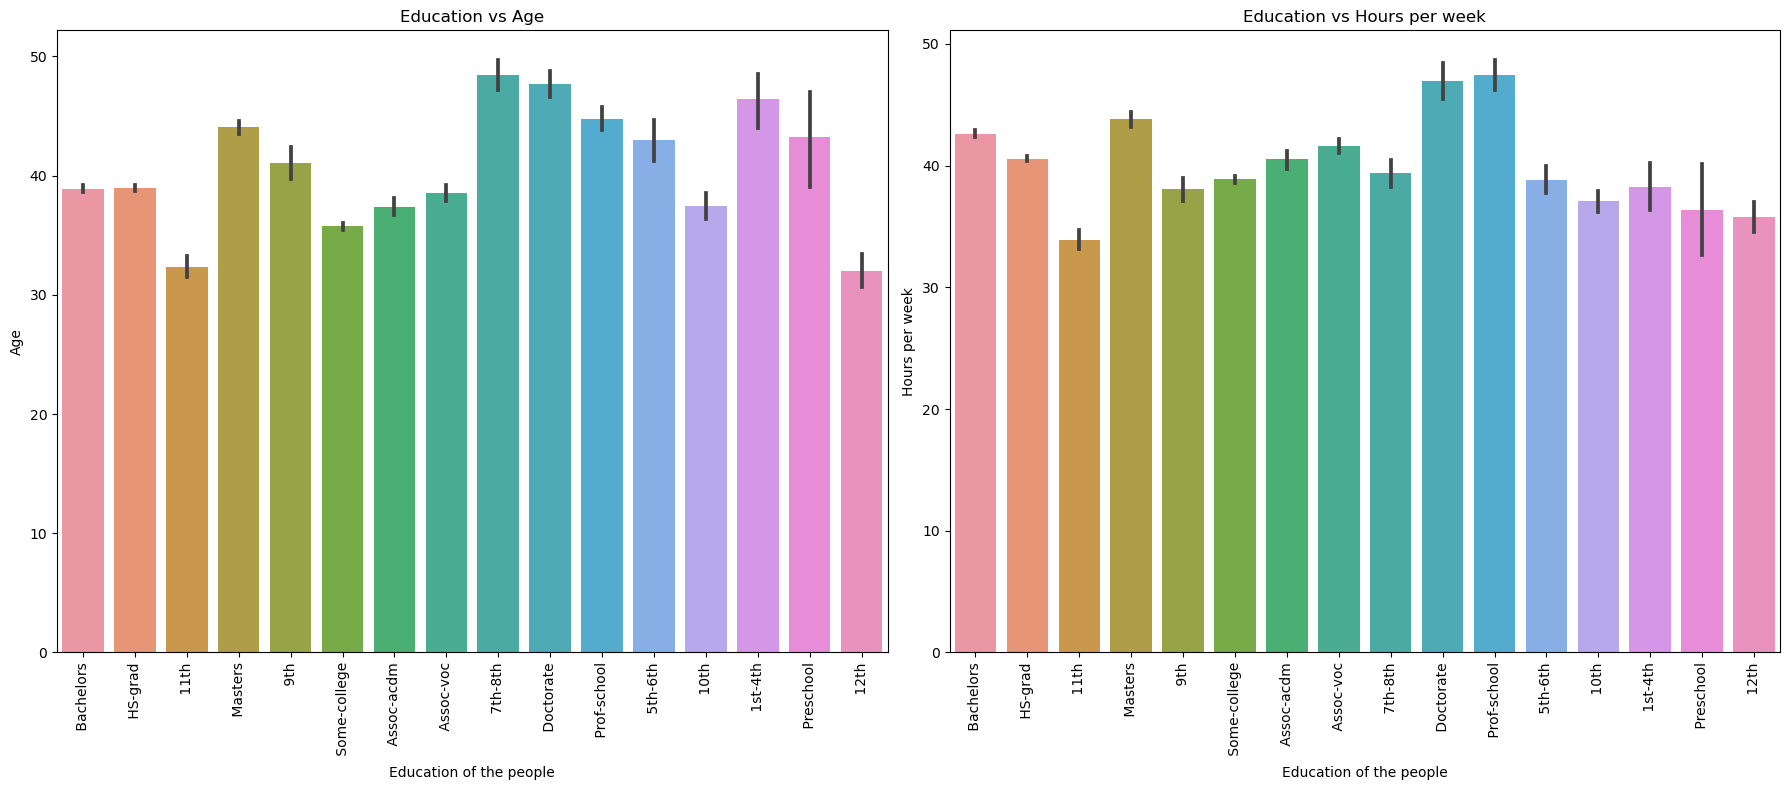

In [102]:
# List of elements to use in y-axis
y_elements = ['age', 'hours-per-week']

# Create subplots (1x2 grid for 2 elements)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Loop through y elements and create a bar plot for each
for i, y in enumerate(y_elements):
    sns.barplot(data=df, x='education', y=y, ax=axes[i])
    axes[i].set_xlabel('Education of the people')
    axes[i].set_ylabel(y.replace('-', ' ').capitalize())
    axes[i].set_title(f'Education vs {y.replace("-", " ").capitalize()}')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

The average age of people with education level as 7th-8th, Doctorate and 1st-4th is greater. (range(40-50 years))

The work hours of people with education level of masters, Doctorate and Professional school are greater. (range(40-50 hours))

#### 4.2 Age column (univariate and bivariate analysis)

##### Univariate analysis (age column)

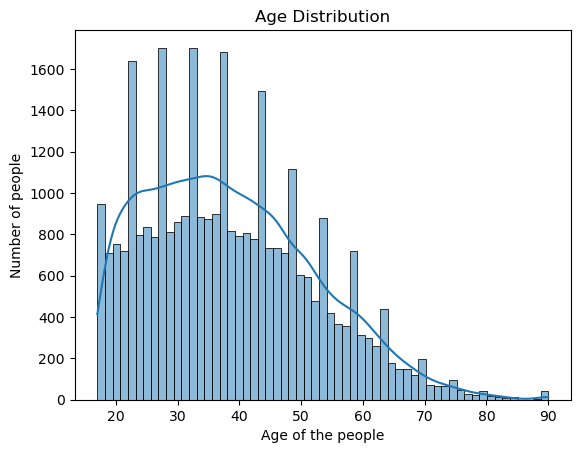

In [114]:
sns.histplot(data=df, x='age', kde=True)
plt.xlabel('Age of the people')
plt.ylabel('Number of people')
plt.title(f'Age Distribution')
plt.show()

Most of the people have the ages in a range of 20 to 50 years

In [108]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


##### Bivariate analysis (age column)